In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns



In [3]:
# df=pd.read_csv("/content/drive/MyDrive/dataset/diabetes_data_upload.csv")
df=pd.read_csv('diabetes_data_upload.csv')
visual=df.copy()
visual

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [22]:
print(df.head())
print(visual.head())

   Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0       1         0           1                   0         1           0   
1       1         0           0                   0         1           0   
2       1         1           0                   0         1           1   
3       1         0           0                   1         1           1   
4       1         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopecia  Obesity  class  Age 

In [8]:
age=df.Age
df.drop(['Age'],inplace=True,axis=1)


In [9]:
df=df.apply(LabelEncoder().fit_transform)

In [10]:
df['Age']=age


In [11]:
features=df.columns
features=features.delete(-2)
X=df[features]
Y=df['class']

In [ ]:
for i in visual.columns:
  if i=='class':
    continue
  if i=='Age':
    sns.boxplot(x='class', y=i, data=visual)
    plt.xlabel('class')
    plt.ylabel(i)
    plt.show()
    continue
  sns.countplot(x=i, hue='class', data=visual)
  plt.xlabel(i)
  plt.ylabel("class")
  plt.show()

In [9]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=50)

In [12]:
models_results={'model':[],'training':[],'testing':[]}

In [13]:
def train_model(model, params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=5)
  grid.fit(x_train,y_train)
  print(grid.best_score_)
  models_results['training'].append(grid.best_score_)
  return grid.best_estimator_

def report(model):
  print(model.get_params())
  preds=model.predict(x_test)
  print(metrics.accuracy_score(y_test,preds))
  models_results['testing'].append(metrics.accuracy_score(y_test,preds))
  cm=metrics.confusion_matrix(y_test,preds)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(y_test,preds))
  metrics.RocCurveDisplay.from_predictions(
      y_test, preds, color='darkorange'
  )
  plt.legend()
  plt.show()


0.9327022375215147
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.8942307692307693


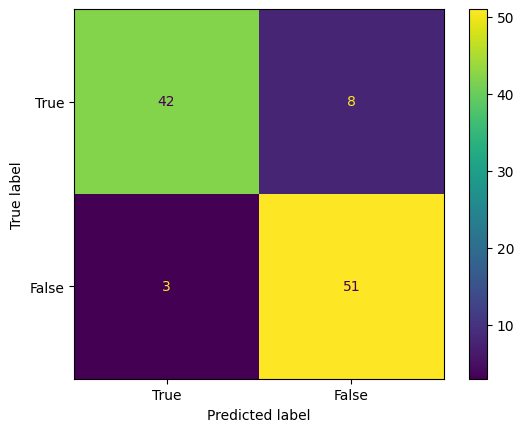

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.86      0.94      0.90        54

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



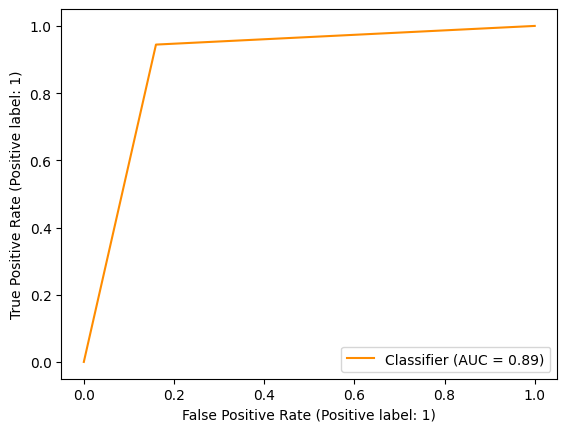

In [14]:
from sklearn.linear_model import LogisticRegression

models_results['model'].append('LogisticRegression')
LR=train_model(LogisticRegression(),{'solver':['liblinear'],'penalty':['l1','l2']})
report(LR)

0.9616179001721171
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 23, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 18, 'splitter': 'best'}
0.9519230769230769


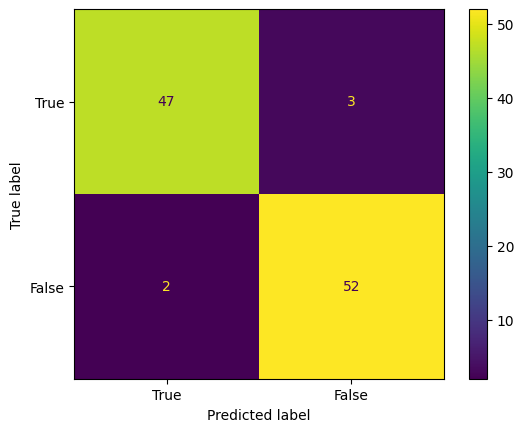

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.95      0.96      0.95        54

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



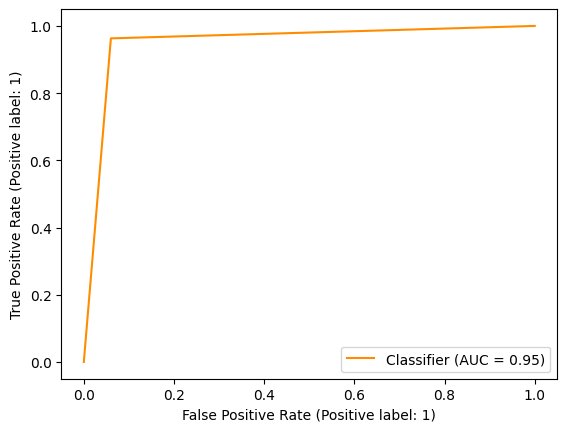

In [15]:
from sklearn.tree import DecisionTreeClassifier

models_results['model'].append('DecisionTree')
DT=train_model(DecisionTreeClassifier(random_state=18),{'criterion':['gini'],"max_depth":list(range(2,21)),'max_leaf_nodes':list(range(10,50))})
report(DT)

0.9760470453241539
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.9519230769230769


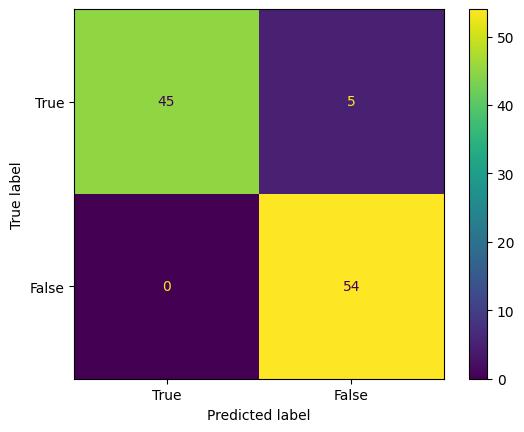

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        50
           1       0.92      1.00      0.96        54

    accuracy                           0.95       104
   macro avg       0.96      0.95      0.95       104
weighted avg       0.96      0.95      0.95       104



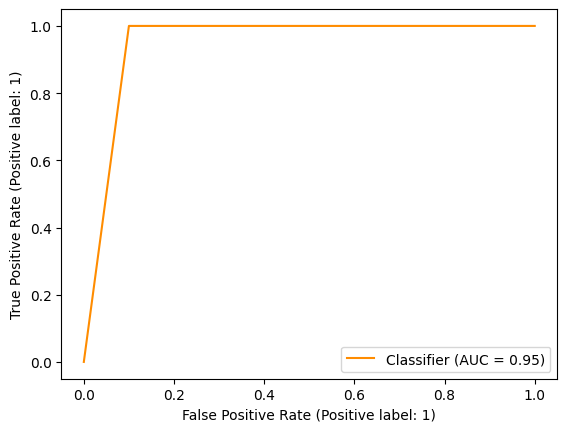

In [16]:
from sklearn.svm import SVC

models_results['model'].append('SVC')
svc=train_model(SVC(max_iter=-1),{'kernel':['linear','rbf'],'C':[0.01,1,10,100,150],'gamma':['auto','scale'],})
report(svc)

0.889443488238669
{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
0.8846153846153846


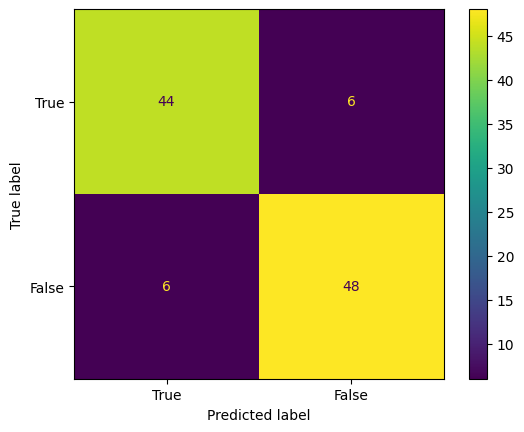

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.89      0.89      0.89        54

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.88      0.88      0.88       104



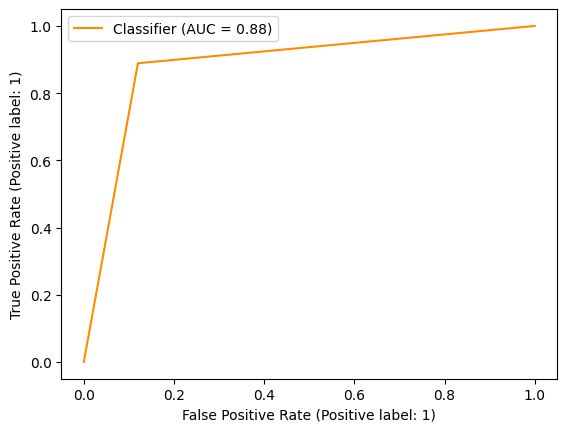

In [17]:
from sklearn.naive_bayes import BernoulliNB

models_results['model'].append('BernoulliNB')
BNB=train_model(BernoulliNB(force_alpha=True),{})
report(BNB)

0.9856855995410212
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.9615384615384616


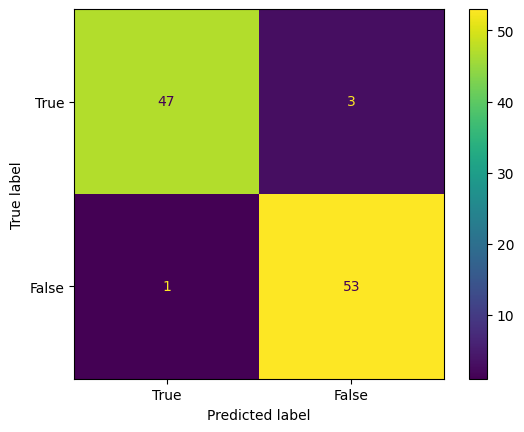

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.95      0.98      0.96        54

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



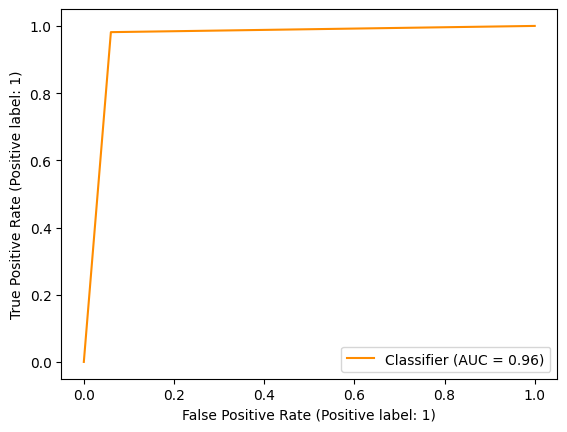

In [26]:
from sklearn.ensemble import RandomForestClassifier

models_results['model'].append('RandomForest')
rf=train_model(RandomForestClassifier(),{'n_estimators':list(range(50,300,10)),"max_depth":list(range(2,21))})
report(rf)

c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9231210556511762
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.9038461538461539


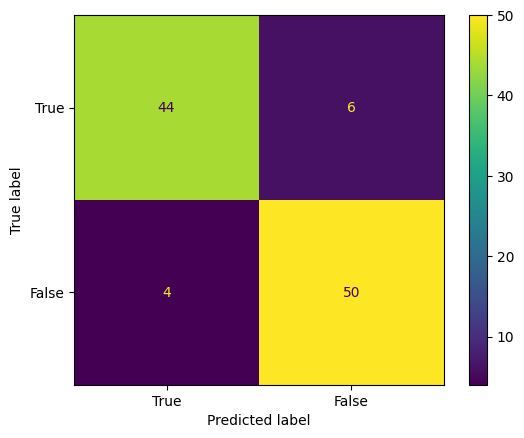

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.89      0.93      0.91        54

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



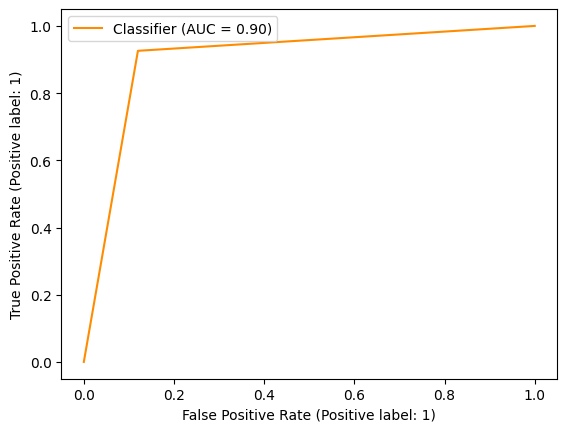

In [19]:
from sklearn.neural_network import MLPClassifier

models_results['model'].append('MLP')
mlp=train_model(MLPClassifier(),{'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],})
report(mlp)

In [ ]:
from xgboost import XGBClassifier

models_results['model'].append('XGBoost')
xgb=train_model(XGBClassifier(),{"max_depth":list(range(2,20))})
report(xgb)

0.9447504302925989
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 210, 'random_state': None}
0.8942307692307693


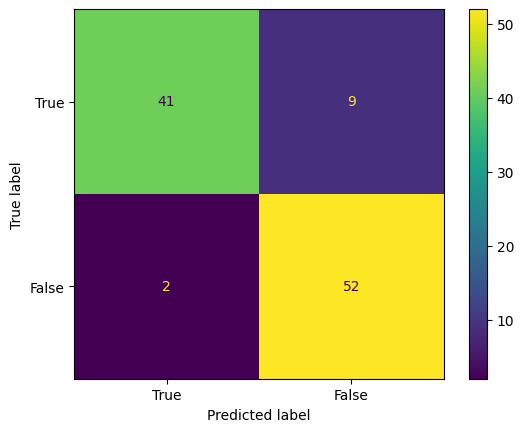

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        50
           1       0.85      0.96      0.90        54

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



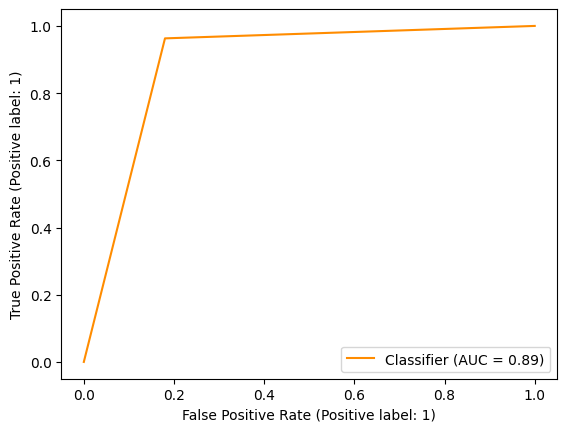

In [21]:
from sklearn.ensemble import AdaBoostClassifier

models_results['model'].append('AdaBoost')
adb=train_model(AdaBoostClassifier(),{"n_estimators":list(range(50,500,10))})

report(adb)

In [25]:
results=pd.DataFrame(models_results)
results.drop_duplicates(subset=['model'],inplace=True)
results['Avg']=round((results.training+results.testing)/2,3)
results

,model,training,testing,Avg
0,LogisticRegression,0.932702,0.894231,0.913
1,DecisionTree,0.961618,0.951923,0.957
2,SVC,0.976047,0.951923,0.964
3,BernoulliNB,0.889443,0.884615,0.887
4,RandomForest,0.985657,0.961538,0.974
5,MLP,0.923121,0.903846,0.913
6,XGBoost,0.976076,0.951923,0.964
7,AdaBoost,0.944750,0.894231,0.919


In [12]:
from xgboost import XGBClassifier

xgb=GridSearchCV(XGBClassifier(booster='gbtree',objective='binary:logistic',eval_metric='logloss',seed=42),{'max_depth':list(range(2,21)),'n_estimators':list(range(50,300,10)), 'learning_rate':[0.05,0.2,0.5,0.7,1]},n_jobs=-1,refit=True,cv=5)
xgb.fit(X,Y)
xgb.best_score_

0.976923076923077

In [21]:
import pickle

# pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(xgb,open('model.pkl','wb'))
